In [3]:
# Imports
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

Dans ce TP

On vous dit qu'il existe 99 classes.

1/Faites extraires les "noms" des différentes classes et vérifiez si leur nombre total correspondant à 99 classes différentes (ou s'il y en a moins ou plus )

Dans ces données vous avez la classification des feuilles dans la colonne "species".

2/ En supposant que vous ignorez toute information concernant les classes et leur nombre (vous supprimez la colonne species):

- créez un classificateur qui utilise les descripteurs (features) pré-extraits fournis  en travaillant sur les données "Leaf Train"  par la méthode des K-means 

(Vous pouvez fixer le nombre de classes K en se basant sur  : 

la CAH  

l'indice d'Elbow

l'indice de la silouhette)  

3/ Sur les données "Test" utiliser le nombre "optimal" de classes que vous auriez choisi et les K-centres mobiles obtenus par l'algorithme et utiliser le Rand_score ou l'indicce de la silouhette pour tester la performance des résultats que vous avez obtenus avec la classification fournie dans le fichier initial "leaf train" en tenant ccompe de la classification fournie tout au début par la colonne species.    


3/ Maintenant, reprenez  la classification  K-Means qui vous semble la meilleure et reprenez là  en appliquant  une ACP aux données "Train" pour réduire le nombre de descripteurs et évaluez si vous obtenez des résultats équivalents ( en  terme de performance et de temps de calcul )


Je vous donne quelques commandes qui pourraient vous être utiles si vous les introduisez dans votre code

1/ Pour visualiser les différent noms de classes  et pour afficher le nombre total de classes (99) du fichier Leaf_train  utiliser (df est la dataframe qui contient les données du fichier Leaf-train.csv)


df["species"].unique()
len(df["species"].unique())

  
2/ Pour connaitre le nombre de fois où une espèce particulière  (Quercus_Variabili')  apparait dans le fichier Leaf_train

df['species'].str.contains('Quercus_Variabili').sum()


 Vous allez remarquer que pour les différentes espèces, vous en avez 10 feuilles représentantes de chaque classe.

3/  je vous indique cette fonction LabelEncoder, en cas où vous préférez traduire les noms de classes en "chiffres".

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


et utiliser inverse_transform pour retrouver les labels des feuilles par la suite à partir des chiffres associés aux classes.


Une autre remarque: Evidemment, on ne vas pas intégrer les images pour la classification ( vous pouvez les utiliser à ce stade pour la visualisation, cependant si on veut les intégrer comme variables supplémentaires d'apprentissage pour une meilleure classificationa, il faudrait redimensionner les images pour avoir le même nombre de Pixels. Cependant, ceci peut altérer en quelque sorte les images . Voir image jointe à titre d'illustration .  

Bon travail

Description des fichiers

train.csv -  training set

test.csv -   test set


images - Dossier des images avec leurs identités correspondantes 

id - an anonymous id unique to an image

margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature

shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature

texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

In [4]:
df = pd.read_csv("train.csv", header = 0, sep = ",")

df.head(10)


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000







## Travail :

In [1]:
import pandas as pd

# Charger les données
df_train = pd.read_csv("train.csv")

# Afficher les noms uniques de classes
classes_uniques = df_train["species"].unique()
print(classes_uniques)

# Vérifier le nombre de classes
print("Nombre total de classes :", len(classes_uniques))


['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii'
 'Acer_Platanoids' 'Quercus_Phillyraeoides' 'Cornus_Chinensis'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Kewensis' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium' 'Quercus_Greggii'
 'Quercus_Suber' 'Quercus_Dolicholepis' 'Ilex_Cornuta' 'Tilia_Oliveri'
 'Quercus_Semecarpifo

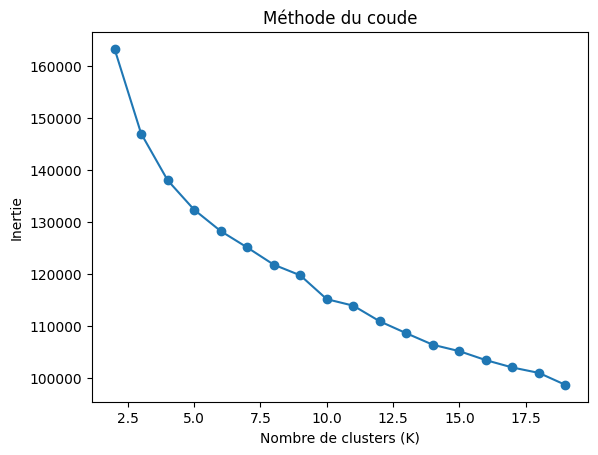

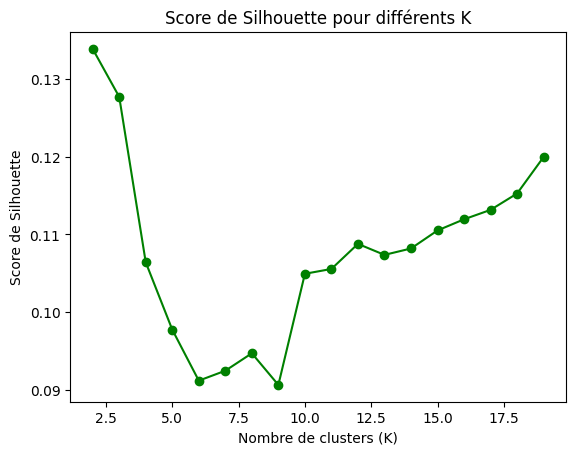

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Supprimer la colonne species
X = df_train.drop(columns=["species", "id"])

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Méthode du coude
inertia = []
K_range = range(2, 20)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.title("Méthode du coude")
plt.show()

# Silhouette Score
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Score de Silhouette")
plt.title("Score de Silhouette pour différents K")
plt.show()
